In [58]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#Python path library support
from pathlib import Path

#python numeric library
import numpy

#scientific library for python
import scipy

#pandas is python library for data analysis
import pandas

#make the plots interactive
%matplotlib inline

#python plotting library
import matplotlib.pyplot as plt

#cadet python interface
from cadet import Cadet

#jupyter widget support
from ipywidgets import interact

In [3]:
#put in the path to the bin folder
cadet_bin_path = Path(r"C:\Users\kosh_000\cadet_build\CADET\VCPKG\bin")

cadet_path = cadet_bin_path / "cadet-cli.exe"

if cadet_path.exists():
    print("CADET was found. Continue to the next step.")
    Cadet.cadet_path = cadet_path.as_posix()
else:
    print('CADET could not be found. Please check the bin path')

CADET was found. Continue to the next step.


In [20]:
#set this to a directory on your computer where the cadet tutorial files can be saved
cadet_tutorial = Path('F:/temp/cadet_tutorial')
lesson_1 = cadet_tutorial / "lesson_1"
lesson_1.mkdir(exist_ok = True, parents=True)

# CADET documentation
CADET documentation is available in PDF form in the Windows build in the zip file and can be downloaded from https://cadet-web.de/static/simulation/cadet_3_1_2.pdf . During this workshop you might want to open the pdf in a new tab or in something like Acrobat. I have embedded this in the notebook but for general usage it is easier to have it open separately.

In [15]:
from IPython.display import IFrame
IFrame("https://cadet-web.de/static/simulation/cadet_3_1_2.pdf", width="100%", height="800")

## Creating a simple model

This is the same example that was used in the installation instructions and will now be looked at in more detail.

CompletedProcess(args=['C:/Users/kosh_000/cadet_build/CADET/VCPKG/bin/cadet-cli.exe', 'F:/temp/cadet_tutorial/lesson_1/simple_example/example.h5'], returncode=0, stdout=b'', stderr=b'')
Simulation completed successfully


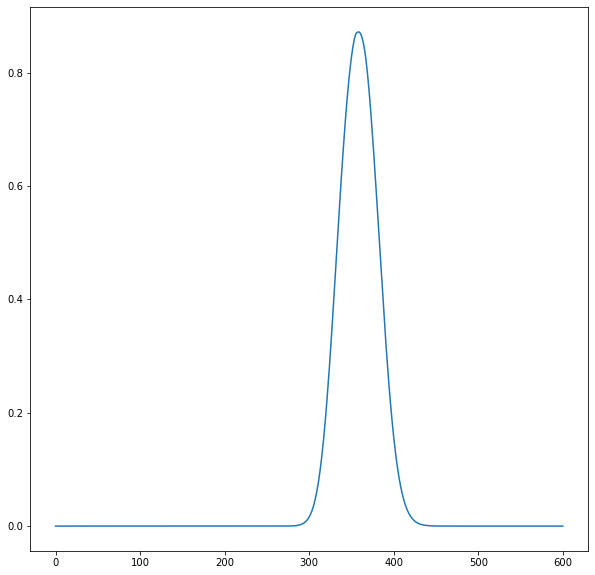

In [75]:
#simple model
simple_example = lesson_1 / "simple_example"
simple_example.mkdir(exist_ok = True)

simple = Cadet()

#give a filename for where the simulation should be saved
simple.filename = (simple_example / 'example.h5').as_posix()

#set the number of unit operations
simple.root.input.model.nunits = 3

#nswitches is the number of different ways the units are connected in this simulation
#This is important for cyclic system and more complex setups
simple.root.input.model.connections.nswitches = 1

simple.root.input.model.connections.switch_000.section = 0

#this connects unit 0 to unit 1 and unit 1 to unit 2 with 2.88e-8 m^3/s with all components
simple.root.input.model.connections.switch_000.connections = [0, 1, -1, -1, 2.88e-8,
                                                              1, 2, -1, -1, 2.88e-8]

#create an inlet
simple.root.input.model.unit_000.unit_type = 'INLET'
simple.root.input.model.unit_000.ncomp = 1
simple.root.input.model.unit_000.inlet_type = 'PIECEWISE_CUBIC_POLY'

#const_coeff + lin_coeff*t + quad_coeff*t^2 + cube_coeff*t^3
simple.root.input.model.unit_000.sec_000.const_coeff = [1.0,]
simple.root.input.model.unit_000.sec_000.lin_coeff = [0.0,]
simple.root.input.model.unit_000.sec_000.quad_coeff = [0.0,]
simple.root.input.model.unit_000.sec_000.cube_coeff = [0.0,]

simple.root.input.model.unit_000.sec_001.const_coeff = [0.0,]
simple.root.input.model.unit_000.sec_001.lin_coeff = [0.0,]
simple.root.input.model.unit_000.sec_001.quad_coeff = [0.0,]
simple.root.input.model.unit_000.sec_001.cube_coeff = [0.0,]

#create an outlet
simple.root.input.model.unit_002.ncomp = 1
simple.root.input.model.unit_002.unit_type = 'OUTLET'

#create a column
simple.root.input.model.unit_001.unit_type = 'LUMPED_RATE_MODEL_WITH_PORES'
simple.root.input.model.unit_001.ncomp = 1
simple.root.input.model.unit_001.adsorption_model = 'NONE'
simple.root.input.model.unit_001.init_c = [0.0,]
simple.root.input.model.unit_001.init_q = [0.0,]
simple.root.input.model.unit_001.col_dispersion = 2.0e-7
simple.root.input.model.unit_001.col_length = 0.25
simple.root.input.model.unit_001.col_porosity = 0.37
simple.root.input.model.unit_001.film_diffusion = [0.0,]
simple.root.input.model.unit_001.par_porosity = 0.33
simple.root.input.model.unit_001.par_radius = 4.5e-5
simple.root.input.model.unit_001.velocity = 1
simple.root.input.model.unit_001.cross_section_area = 1.0386890710931253E-4

#discretization column settings
simple.root.input.model.unit_001.discretization.ncol = 100
simple.root.input.model.unit_001.discretization.nbound = [0,]
simple.root.input.model.unit_001.discretization.use_analytic_jacobian = 1
simple.root.input.model.unit_001.discretization.reconstruction = 'WENO'
simple.root.input.model.unit_001.discretization.gs_type = 1
simple.root.input.model.unit_001.discretization.max_krylov = 0
simple.root.input.model.unit_001.discretization.max_restarts = 10
simple.root.input.model.unit_001.discretization.schur_safety = 1.0e-8

simple.root.input.model.unit_001.discretization.weno.boundary_model = 0
simple.root.input.model.unit_001.discretization.weno.weno_eps = 1e-10
simple.root.input.model.unit_001.discretization.weno.weno_order = 3

#set what values get saved
simple.root.input['return'].unit_000.write_solution_bulk = 0
simple.root.input['return'].unit_000.write_solution_flux = 0
simple.root.input['return'].unit_000.write_solution_inlet = 1
simple.root.input['return'].unit_000.write_solution_outlet = 1
simple.root.input['return'].unit_000.write_solution_particle = 0

simple.root.input['return'].unit_001 = simple.root.input['return'].unit_000
simple.root.input['return'].unit_002 = simple.root.input['return'].unit_000

#automatically run the simulation in parallel
simple.root.input.solver.nthreads = 0

#set the times that the simulator writes out data for
simple.root.input.solver.user_solution_times = numpy.linspace(0, 600, 601)

#set all the tolerances for the time integrator
simple.root.input.solver.time_integrator.abstol = 1e-6
simple.root.input.solver.time_integrator.algtol = 1e-10
simple.root.input.solver.time_integrator.reltol = 1e-6
simple.root.input.solver.time_integrator.init_step_size = 1e-6
simple.root.input.solver.time_integrator.max_steps = 1000000

#solver settings
simple.root.input.solver.sections.nsec = 2
simple.root.input.solver.sections.section_times = [0.0, 50.0, 600.0]
simple.root.input.solver.sections.section_continuity = [0,]

#basic solver settings, these values should rarely be changed
simple.root.input.model.solver.gs_type = 1
simple.root.input.model.solver.max_krylov = 0
simple.root.input.model.solver.max_restarts = 10
simple.root.input.model.solver.schur_safety  = 1e-8

#save the simulation
simple.save()

#run the simulation
data = simple.run()

print(data)

if data.returncode == 0:
    print("Simulation completed successfully")
    
    #load the data from the simulation so we can view the results
    simple.load()
    
    #plot the simulation
    plt.figure(figsize=[10,10])
    plt.plot(simple.root.output.solution.solution_times,
        simple.root.output.solution.unit_002.solution_outlet_comp_000)
    
    #write the chromatogram data out to a csv file
    data = pandas.DataFrame([simple.root.output.solution.solution_times,
                        simple.root.output.solution.unit_001.solution_outlet_comp_000]).transpose()
    data.to_csv((simple_example / 'example.csv').as_posix(), index=False, header=False)
    
else:
    print("Simulation failed")

Simulation completed successfully


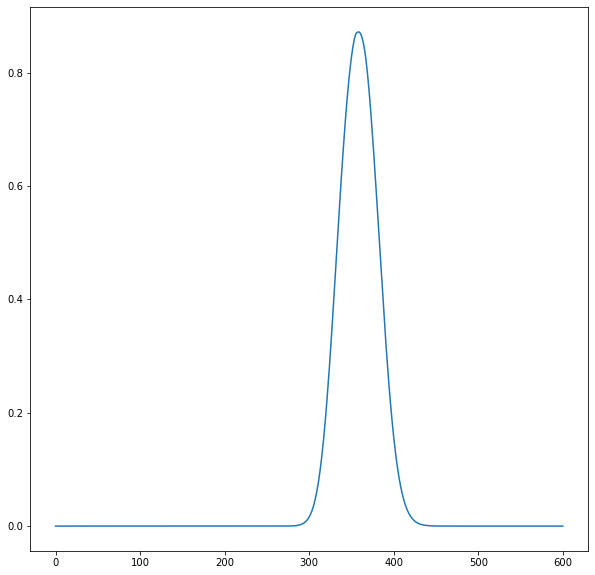

In [76]:
#simple model
simple_example_return = lesson_1 / "simple_example_return"
simple_example_return.mkdir(exist_ok = True)

simple_return = Cadet(simple.root)

#give a filename for where the simulation should be saved
simple_return.filename = (simple_example_return / 'example.h5').as_posix()

#set what values get saved
simple_return.root.input['return'].unit_000.write_solution_bulk = 1
simple_return.root.input['return'].unit_000.write_solution_flux = 0
simple_return.root.input['return'].unit_000.write_solution_inlet = 1
simple_return.root.input['return'].unit_000.write_solution_outlet = 1
simple_return.root.input['return'].unit_000.write_solution_particle = 0

simple_return.root.input['return'].unit_001 = simple_return.root.input['return'].unit_000
simple_return.root.input['return'].unit_002 = simple_return.root.input['return'].unit_000

simple_return.save()


#run the simulation
data = simple_return.run()

if data.returncode == 0:
    print("Simulation completed successfully")
    
    #load the data from the simulation so we can view the results
    simple_return.load()
    
    #plot the simulation
    plt.figure(figsize=[10,10])
    plt.plot(simple_return.root.output.solution.solution_times,
        simple_return.root.output.solution.unit_002.solution_outlet_comp_000)
    
    #write the chromatogram data out to a csv file
    data = pandas.DataFrame([simple_return.root.output.solution.solution_times,
                        simple_return.root.output.solution.unit_001.solution_outlet_comp_000]).transpose()
    data.to_csv((simple_example_return / 'example.csv').as_posix(), index=False, header=False)
    
else:
    print("Simulation failed")

In [77]:
ymax = numpy.max(simple_return.root.output.solution.unit_001.solution_bulk[:])

def graph_column(time=0):
    position = list(range(simple_return.root.input.model.unit_001.discretization.ncol))
    values = simple_return.root.output.solution.unit_001.solution_bulk[time, :, 0]
    plt.figure(figsize=[15,5])
    plt.plot(position, values)
    plt.ylim(0, ymax)

interact(graph_column, time=(0, len(simple_return.root.output.solution.solution_times) -1, 10))

interactive(children=(IntSlider(value=0, description='time', max=600, step=10), Output()), _dom_classes=('widg…

<function __main__.graph_column(time=0)>